# Plot terminus picks over images analyzed

#### Jukes Liu

### Import packages, set paths, and read in image dates

Must install cv2 module.

In [4]:
import sys
# !{sys.executable} -m pip install fiona
!{sys.executable} -m pip install opencv-python

    100% |████████████████████████████████| 26.6MB 3.0MB/s eta 0:00:01


In [247]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.image as mpimg
import cv2
import pandas as pd    
from time import sleep
from IPython.display import clear_output
import scipy.stats
import datetime

Read in image dates as date strings:

In [266]:
#Read in datetags csv as datetime_df
datetime_df = pd.read_csv('/home/jukes/Documents/Sample_glaciers/datetags.csv', sep=',', dtype=str, header=0, names=['Scene', 'datetimes'])
datetime_df.head()

,Scene,datetimes
0,LC80360042017077LGN00,2017-03-18
1,LC80360042015248LGN00,2015-09-05
2,LC80360042015184LGN00,2015-07-03
3,LC80360042016107LGN00,2016-04-16
4,LC80360042015232LGN00,2015-08-20


## _Plot trimmed vs. original terminus picks_

In [27]:
# BoxID = '001'
# metric = "terminus_highestmass/"
# basepath = '/media/jukes/jukes1/LS8aws/'
# imagepath = basepath+"Box"+BoxID+"/rotated/resized/"

# #GRAB LIST OF IMAGENAMES
# imagenames = []

# imagelist = os.listdir(imagepath)
# for image in imagelist:
#     if image.endswith(BoxID+".png"):
#         imagename = image[:-4]
# #         print(imagename)
#         imagenames.append(imagename)
# # print(imagenames)

# #GRAB DAT FILES
# dats = []
# trimdats = []
# imgnames = []
# tot_counter = 0
# fin_counter = 0

# for image in imagenames:
#     tot_counter = tot_counter+1
# #     print(image)
#     datpath = imagepath+image+".pgm_max_gaussian/"+metric
#     datfiles = os.listdir(datpath)
# #     print(datfiles)
#     if len(datfiles) > 0:
#         #only append the imagename to the list and incr the final conuter if datfiles were created for the img
#         imgnames.append(image)
#         fin_counter = fin_counter+1
        
#         #find the trimmed dat file and the original
#         for dat in datfiles:
#             if "trim" in dat:
#                 datfile_trim = dat
#                 trimdats.append(datfile_trim)
#             else:
#                 datfile = dat
#                 dats.append(datfile)
                
#         print(image, datfile_trim, datfile)
        
# print("Chain found for: ", fin_counter, "out of", tot_counter)
# # print(len(imgnames), len(trimdats), len(dats))

In [26]:
# for i in range(0, len(imgnames)):
#     imagename = imgnames[i]
#     dat = dats[i]
#     trimdat = trimdats[i]

#     #Read in image as np array
#     image = mpimg.imread(imagepath+imagename+'.png')
    
#     datpath = imagepath+imagename+".pgm_max_gaussian/"+metric
    
#     #Read in dat file as np array and grab x and y values
#     #TRIMMED:
#     term_trim_dat = np.loadtxt(datpath+trimdat)
#     #ORIGINAL:
#     term_dat = np.loadtxt(datpath+dat)

#     #ORIGINAL
#     term_xs = []
#     term_ys = []

#     #grab x and y values for the terminus line
#     for j in term_dat:
#         x, y = (j[0], j[1])
#         term_xs.append(x)
#         term_ys.append(y)

#     #TRIMMED
#     term_trim_xs = []
#     term_trim_ys = []

#     #grab x and y values for the terminus line
#     for j in term_trim_dat:
#         x, y = (j[0], j[1])
#         term_trim_xs.append(x)
#         term_trim_ys.append(y)

    
#     #plot image and terminus line from dat
#     imgplt = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.plot(term_xs, term_ys, c='orange')
#     plt.axis("off")
#     # plt.savefig('/home/jukes/Documents/seethrucloud_'+imagename1+"2.png", dpi=2000)
#     plt.show()

#     imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     plt.plot(term_trim_xs, term_trim_ys, c='red')
#     plt.axis("off")
#     # plt.savefig('/home/jukes/Documents/seethrucloud_'+imagename1+"2.png", dpi=2000)
#     plt.show()

## Plot all terminus picks and centroid for one BoxID sequentially

If images have not been converted to png from pgm, run the following cell but change the BoxID to the right ID:

In [217]:
%%bash

cd /media/jukes/jukes1/LS8aws/Box531/rotated/resized/
mogrify -format png *.pgm

Read in csv file with terminus positions and change rates

In [272]:
# massorsize = "mass"
terminus_df = pd.read_csv('/home/jukes/Documents/Sample_glaciers/terminuschange_2019_09_03_'+massorsize+'.csv', sep=',', header=0, dtype=str, index_col=0)
print(terminus_df.shape)
terminus_df.head()

(884, 10)


,BoxID,Scene,Mid_X,Mid_Y,datetimes,xdist_leftmost,xdist_midpoint,changerates,Cloudpercent,Avgpixel_percent
0,001,LC80320052013134LGN03,169.0,149.0,2013-05-14,825.0,780.0,38.333333333333336,0.0,43
1,001,LC80330052013141LGN01,184.0,153.0,2013-05-21,1050.0,1005.0,32.142857142857146,0.6,40
2,001,LC80360042013146LGN00,145.0,160.0,2013-05-26,465.0,420.0,-117.0,0.0,49
3,001,LC80340052013148LGN00,145.0,160.0,2013-05-28,465.0,420.0,0.0,0.4,44
4,001,LC80310052013239LGN00,140.0,158.0,2013-08-27,390.0,345.0,-0.8241758241758241,0.6,26


Load in the images, dat files for the terminus pick, and trimmed dat files as well as the date:

In [276]:
BOI= '174'
print("Box"+BOI)
massorsize = "mass"
metric = "terminus_highest"+massorsize+"/"
basepath = '/media/jukes/jukes1/LS8aws/'
imagepath = basepath+"Box"+BOI+"/rotated/resized/"

#make results directory in BoxID folder if it doesn't already exist
if os.path.exists(basepath+"Box"+BOI+"/Results/"):
    print("RESULTS FOLDER EXISTS ALREADY. SKIP.")
#OTHERWISE, create the folder and download into it
else:
    os.mkdir(basepath+"Box"+BOI+"/Results/")
    print("Results  folder made")

#make lists to store image data and grab image files
imgfiles = os.listdir(imagepath)
# images = []
# term_dats = []
# imgnames = []
image_arrays = []
dats = []
trimdats = []
imgnames = []
boxids = []

for imgfile in imgfiles:
    #grab image files and append to images list
    if imgfile.endswith(BOI+".png"):
#         print(imgfile)
        image = mpimg.imread(imagepath+imgfile)
        imgname = imgfile[0:-4]
        scenename = imgname[7:-16]
        pathtodat = imagepath+imgname+".pgm_max_gaussian/"+metric
        datfiles = os.listdir(pathtodat)
        
        #if there are datfiles and not cloudy, grab the trimmed and non-trimmed files
        if len(datfiles) > 0: #and avgpix_val < avgpix_thresh and skew > -0.80:
            #append the image array and the image name to the list
            image_arrays.append(image)
            imgnames.append(scenename)
            boxids.append(BOI)
            
            #find the trimmed dat file and the original
            for dat in datfiles:
                if "trim" in dat:
                    datfile_trim = dat
                    trimdats.append(datfile_trim)
                else:
                    datfile = dat
                    dats.append(datfile)

#         print(image, datfile_trim, datfile)
        else:
            print("NO DAT FILES CREATED FOR TERMINUS PICK")

print(len(image_arrays), len(dats), len(trimdats), len(imgnames),len(boxids))
images_df = pd.DataFrame(list(zip(imgnames, boxids, image_arrays, dats, trimdats)),
              columns=['Scene','BoxID','Image_array', 'Dat_filename', "Trimmed_dat_filename"])

Box174
RESULTS FOLDER EXISTS ALREADY. SKIP.
NO DAT FILES CREATED FOR TERMINUS PICK
60 60 60 60 60


In [277]:
print(images_df.shape)
images_df.head()

(60, 5)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename
0,LC82320172015245LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_017.dat,terminus_highestmass_trim_017.dat
1,LC82320172015037LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_036.dat,terminus_highestmass_trim_036.dat
2,LC82320172015149LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_045.dat,terminus_highestmass_trim_045.dat
3,LC82320172014194LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_033.dat,terminus_highestmass_trim_033.dat
4,LC82320172013143LGN01,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_049.dat,terminus_highestmass_trim_049.dat


Join date to images_df by joining on index (Img_Date or Scene):

In [278]:
images_df.sort_values(by='Scene')
datetime_df = datetime_df.sort_values(by='Scene')

print(datetime_df.shape)
datetime_df.head()

(1687, 2)


,Scene,datetimes
1123,LC80010142013109LGN01,2013-04-19
1140,LC80010142013141LGN01,2013-05-21
1125,LC80010142013237LGN00,2013-08-25
1157,LC80010142013269LGN00,2013-09-26
1137,LC80010142013285LGN00,2013-10-12


In [288]:
new_df = images_df.merge(datetime_df, how= 'inner', on = 'Scene')
dated_images_df = new_df.sort_values(by='datetimes')
print(dated_images_df.shape)
dated_images_df.head()

(60, 6)


,Scene,BoxID,Image_array,Dat_filename,Trimmed_dat_filename,datetimes
23,LC82320172013111LGN01,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_043.dat,terminus_highestmass_trim_043.dat,2013-04-21
4,LC82320172013143LGN01,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_049.dat,terminus_highestmass_trim_049.dat,2013-05-23
53,LC82320172013255LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_031.dat,terminus_highestmass_trim_031.dat,2013-09-12
58,LC82320172013271LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_006.dat,terminus_highestmass_trim_006.dat,2013-09-28
41,LC82320172013319LGN00,174,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_041.dat,terminus_highestmass_trim_041.dat,2013-11-15


Combine with terminus df

In [289]:
dated_images_df = terminus_df.merge(dated_images_df, how = 'inner', on = ['Scene', 'BoxID'])
#drop the rows with Nans
# dated_images_df = dated_images_df.dropna()
# dated_images_df = dated_images_df.set_index('Scene')
print(dated_images_df.shape)
dated_images_df

(41, 14)


,BoxID,Scene,Mid_X,Mid_Y,datetimes_x,xdist_leftmost,xdist_midpoint,changerates,Cloudpercent,Avgpixel_percent,Image_array,Dat_filename,Trimmed_dat_filename,datetimes_y
0,174,LC82320172013271LGN00,299.0,316.0,2013-09-28,840.0,577.5,-73.125,2.1,24,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_006.dat,terminus_highestmass_trim_006.dat,2013-09-28
1,174,LC82320172013319LGN00,306.0,282.0,2013-11-15,945.0,682.5,2.1875,2.6,24,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_041.dat,terminus_highestmass_trim_041.dat,2013-11-15
2,174,LC82320172014002LGN00,273.0,341.0,2014-01-02,450.0,187.5,-10.3125,0.0,62,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_042.dat,terminus_highestmass_trim_042.dat,2014-01-02
3,174,LC82320172014018LGN00,302.0,319.0,2014-01-18,885.0,622.5,27.1875,0.4,39,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_005.dat,terminus_highestmass_trim_005.dat,2014-01-18
4,174,LC82320172014066LGN00,284.0,316.0,2014-03-07,615.0,352.5,-5.625,0.5,27,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_047.dat,terminus_highestmass_trim_047.dat,2014-03-07
5,174,LC82320172014130LGN00,308.0,320.0,2014-05-10,975.0,712.5,-48.75,0.0,40,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_000.dat,terminus_highestmass_trim_000.dat,2014-05-10
6,174,LC82320172014146LGN00,303.0,313.0,2014-05-26,900.0,637.5,-4.6875,0.4,43,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_017.dat,terminus_highestmass_trim_017.dat,2014-05-26
7,174,LC82320172014194LGN00,332.0,344.0,2014-07-13,1335.0,1072.5,9.0625,2.3,35,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_033.dat,terminus_highestmass_trim_033.dat,2014-07-13
8,174,LC82320172014210LGN00,312.0,329.0,2014-07-29,1035.0,772.5,-18.75,2.4,33,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_007.dat,terminus_highestmass_trim_007.dat,2014-07-29
9,174,LC82320172014258LGN00,300.0,309.0,2014-09-15,855.0,592.5,-3.75,3.0,24,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",terminus_highestmass_035.dat,terminus_highestmass_trim_035.dat,2014-09-15


### Plot terminus pick and centroid over each image

In [302]:
for index, row in dated_images_df.iterrows():
        imagename = row['Scene']
        dat = row['Dat_filename']
        trimdat = row['Trimmed_dat_filename']
        date = row['datetimes_x']
        midpoint_x = np.round_(float(row['Mid_X']))
        midpoint_y = np.round_(float(row['Mid_Y']))

        if type(row['changerates']) == 'string':
            changerate = row['changerates']
        else:
            changerate = "%.1f" % float(row['changerates'])

        termposition = "%.1f" % float(row['xdist_leftmost'])

        #Read in image as np array
        image = mpimg.imread(imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+'.png')

        datpath = imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric

        #Read in dat file as np array and grab x and y values
        #TRIMMED:
        term_trim_dat = np.loadtxt(datpath+trimdat)

#         #ORIGINAL:
#         term_dat = np.loadtxt(datpath+dat)

#         #ORIGINAL
#         term_xs = []
#         term_ys = []

#         #grab x and y values for the terminus line
#         for j in term_dat:
#             x, y = (j[0], j[1])
#             term_xs.append(x)
#             term_ys.append(y)

        #TRIMMED
        term_trim_xs = []
        term_trim_ys = []

        #grab x and y values for the terminus line
        for j in term_trim_dat:
    #         print(j)
            x, y = (j[0], j[1])
            term_trim_xs.append(x)
            term_trim_ys.append(y)

        plt.figure(figsize=(20,10))
    #     #PLOT DATE IN TOP LEFT CORNER!
        plt.text(20, 25, date, fontsize=16, color='w')
#         plt.text(400, 25, changerate, fontsize=16, color='w')

        imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        #plot trimmed line and centroid in red
        plt.plot(term_trim_xs, term_trim_ys, c='red')
        plt.plot(midpoint_x, midpoint_y, color='yellow', marker='x')

        plt.axis("off")

        plt.savefig(basepath+"Box"+BOI+"/Results/term_"+massorsize+"_trim_"+imagename+".png", dpi=500, bbox_inches='tight')
        plt.show()

#         sleep(1.5)
        clear_output()


### Show one image & pick at a time:

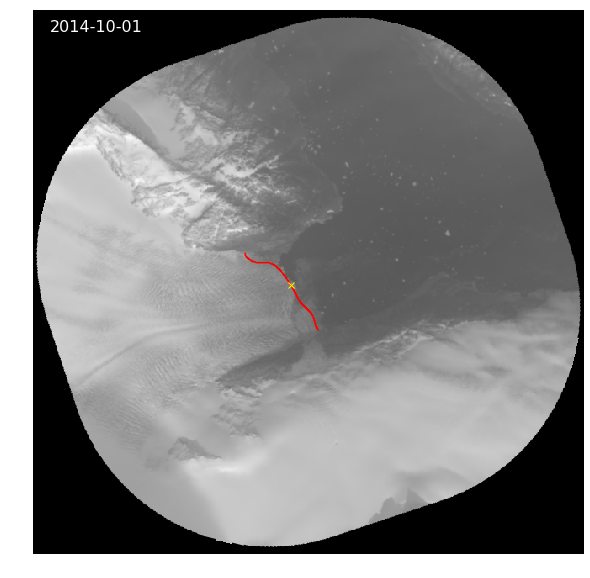

In [306]:
for index, row in dated_images_df.iterrows():
    if index == 10:
        imagename = row['Scene']
        dat = row['Dat_filename']
        trimdat = row['Trimmed_dat_filename']
        date = row['datetimes_x']
        midpoint_x = np.round_(float(row['Mid_X']))
        midpoint_y = np.round_(float(row['Mid_Y']))

        if type(row['changerates']) == 'string':
            changerate = row['changerates']
        else:
            changerate = "%.1f" % float(row['changerates'])

        termposition = "%.1f" % float(row['xdist_leftmost'])

        #Read in image as np array
        image = mpimg.imread(imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+'.png')

        datpath = imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric

        #Read in dat file as np array and grab x and y values
        #TRIMMED:
        term_trim_dat = np.loadtxt(datpath+trimdat)

        term_trim_xs = []
        term_trim_ys = []

        #grab x and y values for the terminus line
        for j in term_trim_dat:
    #         print(j)
            x, y = (j[0], j[1])
            term_trim_xs.append(x)
            term_trim_ys.append(y)

        plt.figure(figsize=(20,10))
    #     #PLOT DATE IN TOP LEFT CORNER!
        plt.text(20, 25, date, fontsize=16, color='w')
#         plt.text(400, 25, changerate, fontsize=16, color='w')

        imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        #plot trimmed line and centroid in red
        plt.plot(term_trim_xs, term_trim_ys, c='red')
        plt.plot(midpoint_x, midpoint_y, color='yellow', marker='x')

        plt.axis("off")

#         plt.savefig(basepath+"Box"+BOI+"/Results/term_"+massorsize+"_trim_"+imagename+".png", dpi=500, bbox_inches='tight')
        plt.show()

#         sleep(1.5)
#         clear_output()

## Plot multiple terminus picks over 1 image with color scheme by date

In [286]:
BOI = '174'
#get list of images
print("Box"+BOI)
basepath = '/media/jukes/jukes1/LS8aws/'
imagepath = basepath+"Box"+BOI+"/rotated/resized/"
pathtoimgs = imagepath
imgfiles = os.listdir(pathtoimgs)
images = []
term_dats = []
imgnames = []

for imgfile in imgfiles:
    #grab image files and append to images list
    if imgfile.endswith(BOI+".png"):
        print(imgfile)
        image = mpimg.imread(pathtoimgs+imgfile)
        
        
        #grab dat files
        pathtodat = pathtoimgs+imgfile[0:-4]+".pgm_max_gaussian/terminus_highestmass/"
        datfiles = os.listdir(pathtodat)
        
        #if there is a dat file:
        if len(datfiles) > 0:
            #grab the dat file and read it in and append to the list
            for datfile in datfiles:
                if "trim" in datfile:
                    term_dat = np.loadtxt(pathtodat+datfile)
                    term_dats.append(term_dat)
#                     print(term_dat.shape)
                    #append the image name
                    images.append(image)
                    imgnames.append(imgfile)
        else:
            print("NO DAT FILE FOUND")
    if imgfile.endswith("raster_cut.png"):
        boxrasterfile = imgfile
        print("Raster found for Box", BOI)
        print(boxrasterfile)
print(len(term_dats), len(images))

Box174
crop_R_LC82320172015245LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015229LGN00_B8_PS_Buffer174.png
NO DAT FILE FOUND
crop_R_LC82320172015037LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015149LGN00_B8_PS_Buffer174.png
crop_R_LC82320172014194LGN00_B8_PS_Buffer174.png
crop_R_LC82320172013143LGN01_B8_PS_Buffer174.png
crop_R_LC82320172014066LGN00_B8_PS_Buffer174.png
crop_R_LC82320172016088LGN00_B8_PS_Buffer174.png
crop_R_LC82320172014130LGN00_B8_PS_Buffer174.png
crop_R_LC82320172014338LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015293LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015197LGN00_B8_PS_Buffer174.png
Raster found for Box 174
crop_Box174_raster_cut.png
crop_R_LC82320172015085LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015213LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015053LGN00_B8_PS_Buffer174.png
crop_R_LC82320172014098LGN00_B8_PS_Buffer174.png
crop_R_LC82320172014210LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015117LGN00_B8_PS_Buffer174.png
crop_R_LC82320172015021LGN00_B8_PS_Buffer

In [287]:
imgfiles = os.listdir(pathtoimgs)
imgplts = []
names = []

for imgfile in imgfiles:
    if imgfile.endswith(BOI+'.png'):
        imgname = imgfile
        image = mpimg.imread(pathtoimgs+imgfile)
        imgplts.append(image)
        names.append(imgname[:-4]+".pgm")
        
print(len(imgplts), len(names))

61 61


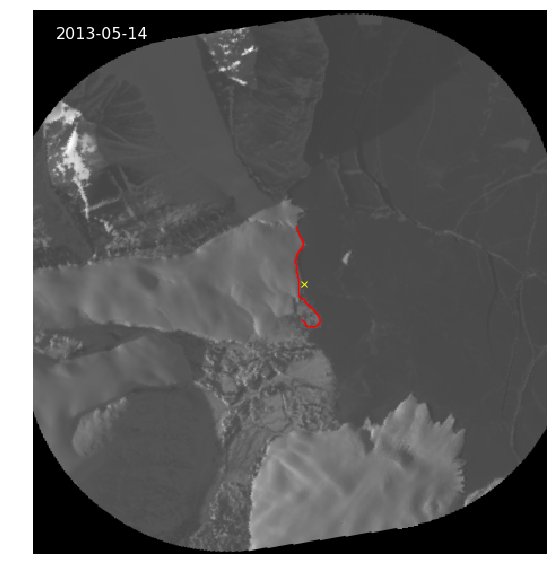

In [246]:
index = 1

metric = 'terminus_highestmass/'
datpath = imagepath+names[index]+"_max_gaussian/"+metric 
dats = os.listdir(datpath)
        
for dat in dats:
    if 'trim' in dat:
        term_trim_dat = np.loadtxt(datpath+dat)
                
        #TRIMMED
        term_trim_xs = []
        term_trim_ys = []

        #grab x and y values for the terminus line
        for j in term_trim_dat:
            x, y = (j[0], j[1])
            term_trim_xs.append(x)
            term_trim_ys.append(y)

        #CALCULATE CENTROIDS
        trim_center_x, trim_center_y = centroid(term_trim_xs, term_trim_ys)
#         print(trim_center_x)

#PLOT DATE IN TOP LEFT CORNER!
plt.figure(figsize=(20,10))
plt.text(20, 25, date, fontsize=16, color='w')

plt.imshow(cv2.cvtColor(imgplts[index], cv2.COLOR_BGR2RGB))
plt.plot(term_trim_xs, term_trim_ys, c='red')
plt.plot(trim_center_x, trim_center_y, color='yellow', marker='x')

plt.axis("off")
plt.axis("off")
plt.show()

In [ ]:
        datpath = imagepath+"crop_R_"+imagename+"_B8_PS_Buffer"+BOI+".pgm_max_gaussian/"+metric   
        dats = os.listdir(datpath)
        
        for dat in dats:
            if 'trim' in dat:
                term_trim_dat = np.loadtxt(datpath+trimdat)
                
                #TRIMMED
                term_trim_xs = []
                term_trim_ys = []

                #grab x and y values for the terminus line
                for j in term_trim_dat:
            #         print(j)
                    x, y = (j[0], j[1])
                    term_trim_xs.append(x)
                    term_trim_ys.append(y)

                #CALCULATE CENTROIDS
                center_x, center_y = centroid(term_xs, term_ys)
                trim_center_x, trim_center_y = centroid(term_trim_xs, term_trim_ys)
                
                        plt.figure(figsize=(20,10))

#         plt.text(400, 25, changerate, fontsize=16, color='w')

        imgplt_trim = plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        #plot original line in orange and centroid
    #     plt.plot(term_xs, term_ys, c='orange')
    #     plt.plot(center_x, center_y, color='orange', marker='x')

        #plot trimmed line and centroid in red
        plt.plot(term_trim_xs, term_trim_ys, c='red')
        plt.plot(trim_center_x, trim_center_y, color='yellow', marker='x')

        plt.axis("off")

#         plt.savefig(basepath+"Box"+BOI+"/Results/term_"+massorsize+"_trim_"+imagename+".png", dpi=500, bbox_inches='tight')
        plt.show()

In [59]:
print(np.max(termbox))

0.003921569


crop_R_LC80360042015072LGN00_B8_PS_Buffer001.png average pixel value: 0.33917812
crop_R_LC80320052016255LGN00_B8_PS_Buffer001.png average pixel value: 0.3107036
crop_R_LC80370042016226LGN00_B8_PS_Buffer001.png average pixel value: 0.23648998
crop_R_LC80360042016219LGN00_B8_PS_Buffer001.png average pixel value: 0.29790175
crop_R_LC80320052015268LGN00_B8_PS_Buffer001.png average pixel value: 0.36058044
crop_R_LC80340052015202LGN00_B8_PS_Buffer001.png average pixel value: 0.28562254
crop_R_LC80310052015245LGN00_B8_PS_Buffer001.png average pixel value: 0.35686642
crop_R_LC80370042016130LGN00_B8_PS_Buffer001.png average pixel value: 0.20879886
crop_R_LC80330052016070LGN00_B8_PS_Buffer001.png average pixel value: 0.34135434
crop_R_LC80340052017095LGN00_B8_PS_Buffer001.png average pixel value: 0.36437362
crop_R_LC80350052017070LGN00_B8_PS_Buffer001.png average pixel value: 0.30770797
crop_R_LC80310052014242LGN00_B8_PS_Buffer001.png average pixel value: 0.32078135
crop_R_LC80370042015191LGN00_

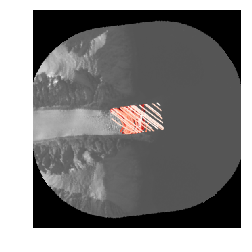

In [35]:
# #imgplt = plt.imshow(images[40])
# imgplt = plt.imshow(mpimg.imread('/home/jukes/Documents/Sample_glaciers/Box001/rotated_images/final/crop_PS_LC08_L1TP_031005_20180825_20180829_01_T1_B8_Buffer001cut.png'))
imgplt = plt.imshow(cv2.cvtColor(imgplts[index], cv2.COLOR_BGR2RGB))
final_imgnames = []

xs = []
ys = []
for i in range(0, len(images)):
#     print(i)
    index = i
    #imgplt = plt.imshow(images[index])#cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))\
    avgpxval = np.average(images[index])
   
    #if the pixel value is above a threshold, then grab the terminus
    if avgpxval < 0.37:
        final_imgnames.append(imgnames[index])
        print(imgnames[index], "average pixel value:", avgpxval)
        term = term_dats[index]
        term_xs = []
        term_ys = []

        #grab x and y values for the terminus line
        for j in term:
            x, y = (j[0], j[1])
            term_xs.append(x)
            term_ys.append(y)
        
        xs.append(term_xs)
        ys.append(term_ys)

#create dataframe with the term line coordinates and sort by date
termlines_df = pd.DataFrame(
    {'imgnames': final_imgnames,
     'X': xs,
     'Y': ys
    })

termlines_df = termlines_df.sort_values(by=['imgnames'])
termlines_df.head()

# #create reversed red color map for the lines
n=len(termlines_df.index)
print("Lines:", n)
colors = pl.cm.Reds_r(np.linspace(0,1,n))
col_count = 0

name = list(termlines_df['imgnames'])
x_final = list(termlines_df['X'])
y_final = list(termlines_df['Y'])

#plot each termline
for a in range(0, n):
    x, y = x_final[a], y_final[a]
    pl.plot(x, y, color=colors[col_count], linewidth=1)
    col_count = col_count+1

plt.axis("off")

plt.savefig('/home/jukes/Documents/Sample_glaciers/Termpicks_Box'+BOI+".png", dpi=2000, bbox_inches='tight')

plt.show()
            
            